In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/spam.csv",encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [70]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [71]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [72]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [73]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [76]:
data["Message Length"]=data["Message"].apply(len)

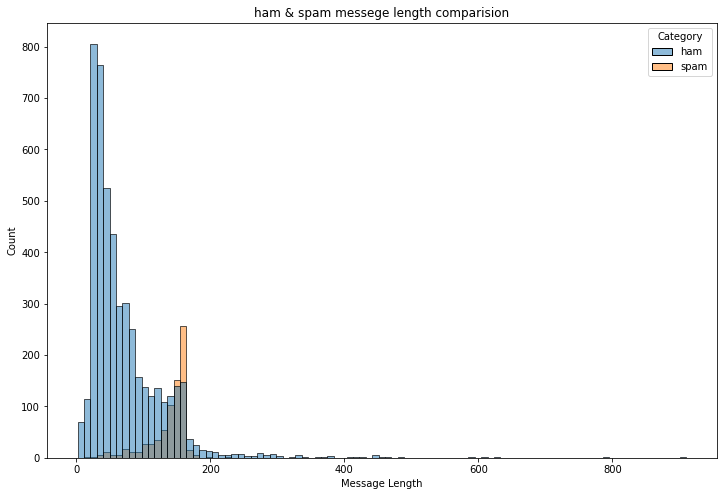

In [77]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [119]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
print(ham_desc)

count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64


In [120]:
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()
print(spam_desc)

count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [79]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [80]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

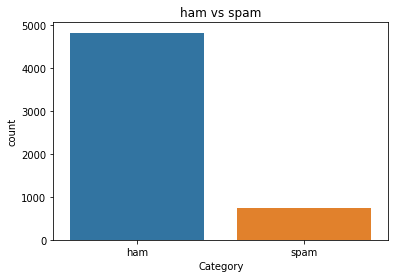

In [81]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [82]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


In [83]:

minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])


minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index


random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])

df=data.loc[undersampled_indices]


df=df.sample(frac=1)


df=df.reset_index()

df=df.drop(
    columns=["index"],
)


In [84]:
df.shape

(1494, 3)

In [85]:
df["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

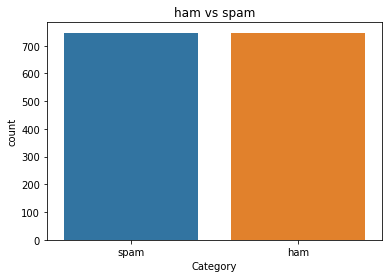

In [86]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [87]:
df.head()

,Category,Message,Message Length
0,spam,3. You have received your mobile content. Enjoy,47
1,ham,Are u awake? Is there snow there?,33
2,spam,Reply to win å£100 weekly! What professional s...,107
3,spam,"XXXMobileMovieClub: To use your credit, click ...",149
4,ham,Hi here. have birth at on the to at 8lb 7oz....,81


In [88]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

display head to see the new column

In [89]:
df.head()

,Category,Message,Message Length,Label
0,spam,3. You have received your mobile content. Enjoy,47,1
1,ham,Are u awake? Is there snow there?,33,0
2,spam,Reply to win å£100 weekly! What professional s...,107,1
3,spam,"XXXMobileMovieClub: To use your credit, click ...",149,1
4,ham,Hi here. have birth at on the to at 8lb 7oz....,81,0


In [90]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [91]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:

corpus=[]


for message in df["Message"]:
 
    message=re.sub("[^a-zA-Z]"," ",message)
    
    message=message.lower()

    message=message.split()
    
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
  
    message=" ".join(message)

    corpus.append(message)

In [93]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [94]:
df["Message Length"].describe()

count    1494.000000
mean      105.309237
std        55.435384
min         3.000000
25%        50.000000
50%       120.000000
75%       153.000000
max       444.000000
Name: Message Length, dtype: float64

In [96]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [97]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [98]:
df_final=pd.concat([extract_features,target],axis=1)

In [99]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6356,6253,6020,713,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2203,5305,5143,0
2,0,0,0,0,0,0,0,0,0,0,...,6979,4192,8624,4007,5702,2272,935,2479,6822,1
3,0,0,0,0,0,0,0,0,0,0,...,4967,6595,6838,6351,8073,8561,9366,6869,3882,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,8618,6600,6133,1480,1483,1775,2426,0


In [100]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)


In [103]:
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [104]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential


In [105]:
model=Sequential()

In [118]:
feature_num=100
model.add(Embedding(input_dim=vocab_size,output_dim=feature_num,input_length=sentence_len))
model.add(LSTM(units=128))
model.add(Dense(units=1,activation="sigmoid"))

In [107]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [108]:
model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 13s 329ms/step - loss: 0.5431 - accuracy: 0.7477 - val_loss: 0.3537 - val_accuracy: 0.8534
Epoch 2/10
34/34 [==============================] - 11s 310ms/step - loss: 0.1771 - accuracy: 0.9434 - val_loss: 0.1246 - val_accuracy: 0.9634
Epoch 3/10
34/34 [==============================] - 10s 308ms/step - loss: 0.0598 - accuracy: 0.9833 - val_loss: 0.1055 - val_accuracy: 0.9738
Epoch 4/10
34/34 [==============================] - 11s 317ms/step - loss: 0.0271 - accuracy: 0.9944 - val_loss: 0.0953 - val_accuracy: 0.9791
Epoch 5/10
34/34 [==============================] - 10s 309ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.1330 - val_accuracy: 0.9581
Epoch 6/10
34/34 [==============================] - 13s 400ms/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.1174 - val_accuracy: 0.9686
Epoch 7/10
34/34 [==============================] - 10s 308ms/step - loss: 0.0399 - accuracy: 0.9954 - val_loss: 0.1011 - val_accuracy: 0.9634

In [109]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 1s 81ms/step


In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [111]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:96.44%


In [112]:
print(confusion_matrix(y_test,y_pred))


[[111   1]
 [  7 106]]


In [113]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:

def classify_message(model,message):
    

    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        
        for sentence in sentences:
            
            words=re.sub("[^a-zA-Z]"," ",sentence)
  
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)
    
            
    oneHot=[one_hot(word,n=vocab_size)]
  
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    
   
    predict=model.predict(text)
    
    
    if predict>0.5:
        print("It is a spam")
       
    else:
        print("It is not a spam")

In [117]:
message1="Hi Sabareeswaran, Happy Morning"
classify_message(model,message1)

1/1 [==============================] - 0s 27ms/step
It is not a spam


In [116]:
message2="This is to inform you had won a lottery and the subscription will end in a week so call us."
classify_message(model,message2)

1/1 [==============================] - 0s 27ms/step
It is a spam
